# 🕴️Title and Executive Summary 

## Twitch Streamers Analysis

You are a struggling Twitch Streamer trying to figure out if you can make it big. You find a data set full of information about the Top 1000 Streamers to help find some insights on them and learn wether or not you are very far behind. You know you have data of more than 31 million viewers daily such as, who they are watching, how long they are watching, who they follow, etc. Your boss tells you, they want to learn more about the audiences that engage with the biggest streamers who are on their site, and who is watching them.

- How does a stream’s average viewership relate to the number of followers? (Scatterplot & Plotly)

- What is the spread of Average viewers across the Top 1000 streams? (Histogram)

- Is there relationship between watch time and stream time? (Relationship Comparison)

- How does average viewership change by language, and then by partnership status? (Multipanel figure of Barcharts)

- How many Streamers are rated Mature? (Barchart)



After deep analysis, the charts and numbers showed: Followers and average viewers only showed a moderate link, and most streamers average under 20,000 viewers with a few huge outliers. Stream time didn’t equal watch time, and partnership or maturity status didn’t change average viewership much. English dominates, but smaller language groups still pull big audiences. In the end, success is about the community and content quality.

## Data Card

Title: Top 1000 Streamers from 2020

Source with a link: 
From the Website Kaggle, presented by Aayush Mishra 
https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

The data set has the following fields: 
1. Channel : Name of Channel
2. Watch time (minutes)
3. Stream time (minutes) 
4. Peak viewers : Highest number of viewers they had at one moment 
5. Average Viewers : Average viewers every stream
6. Followers : Number of total followers
7. Followers gained 
8. Views gained 
9. Partnered (With Twitch) 
10. Mature : Classified as over 18 content 
11. Language : Language the stream is in. 

License: 
CC0: Public Domain

## Loading and File IO

In [3]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
  import plotly.express as px
  import plotly.graph_objects as go
  PLOTLY_AVAILABLE = True
except ImportError:
  PLOTLY_AVAILABLE = False
  print("Note: Plotly not available. Interactive visualizations will be skipped.")

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [ ]:
df = pd.read_csv("data/twitchdata-update.csv")

# converting to pandas dataframe function path: is asking for what type the input will be
def load_csv(path: str) -> pd.DataFrame:
  try:
    # Try to turn the CSV into pandas dataframe and if successful save it as DF.
    df = pd.read_csv(path)
  except FileNotFoundError as e:
    raise FileNotFoundError(
        f"Could not find {path}. check data/ folder and filename.") from e
  except pd.errors.ParserError as e:
    raise ValueError(
        f"Parsing failed for {path}. check delimiter or bad rows.") from e
  else:
    return df

In [ ]:
display(df.head())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Followers_Millions
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,3.246298
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,5.310163
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,1.767635
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,3.944850
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,8.938903


# Simplified Exploratory Data Analysis (EDA)

### How does a stream’s average viewership relate to the number of followers? (Scatterplot & Plotly)

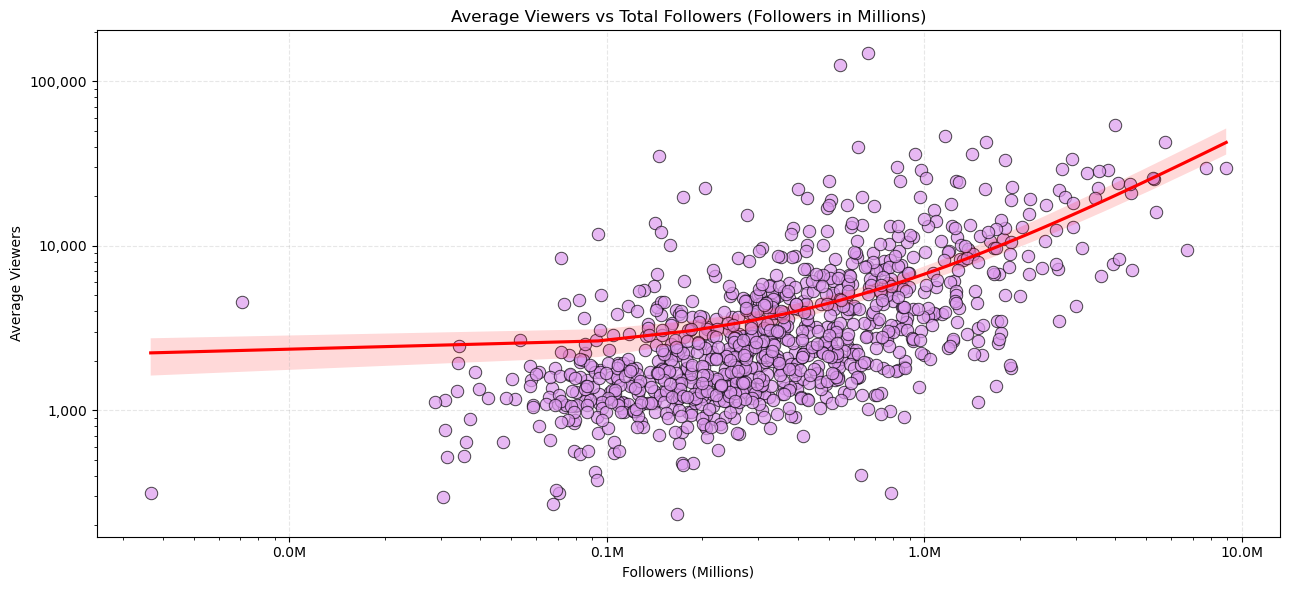

In [ ]:
#How does a stream’s average viewership relate to the number of followers? (Scatterplot & Plotly)

import matplotlib.ticker as ticker  # Changes Labels to be more readable

#Stores Average Viewers in the dataframe into a variable
AvgView = df["Average viewers"]

NumFollow = df["Followers"]

df["Followers_Millions"] = df["Followers"] / \
    1_000_000  #Followers are divided into millions

fig, ax = plt.subplots(figsize=(13, 6))  #Sets size

sns.scatterplot(  #Creates the scatterplot
    data=df,
    x="Followers_Millions",
    y="Average viewers",
    color="#DD9AEE",
    edgecolor="black",
    alpha=0.7,
    s=80
)

sns.regplot(
    data=df,
    x="Followers_Millions",
    y="Average viewers",
    scatter=False,
    color="red",
    ax=ax
)

ax.set_xscale('log')  #Both spread out large numbers
ax.set_yscale('log')


ax.xaxis.set_major_formatter(
    #Both give clear numbers rather than numbers with base 10 and exponents.
    ticker.FuncFormatter(lambda x, pos: f"{x:.1f}M")
)
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f"{int(y):,}")
)

plt.title("Average Viewers vs Total Followers (Followers in Millions)")
plt.xlabel("Followers (Millions)")
plt.ylabel("Average Viewers")
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

### Distribution Characterization of a Key Outcome

In [ ]:
from scipy.stats import skew

totalAVG = df["Average viewers"]
summary = pd.DataFrame({
    "Mean": [totalAVG.mean()],
    "Median": [totalAVG.median()],
    "Std Dev": [totalAVG.std()],
    "Skewness": [skew(totalAVG)],
    "Outliers (>99th percentile)": [(totalAVG > totalAVG.quantile(0.99)).sum()]
})
summary

,Mean,Median,Std Dev,Skewness,Outliers (>99th percentile)
0,4781.04,2425.0,8453.684965,9.05298,10


### Interactive plot

In [ ]:
fig = px.scatter(
    df,
    x="Followers",
    y="Average viewers",
    color="Language",
    hover_name="Channel",
    size="Average viewers",
    log_x=True,
    log_y=True,
    title="Average Viewers vs Followers"
)
fig.show()

### Correlation Between Two Numeric Variables

Pearson r = 0.4283032249654135 p = 7.074502598361057e-46


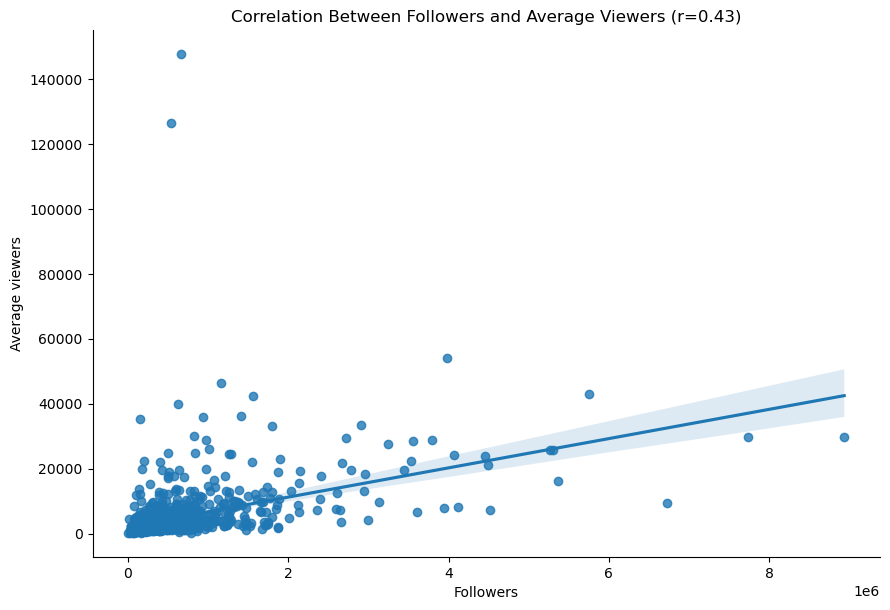

In [201]:
from scipy.stats import pearsonr
y = df["Followers"]
x = df["Average viewers"]

r, p = pearsonr(x, y)
print("Pearson r =", r, "p =", p)

sns.lmplot(data=df, x="Followers", y="Average viewers", height=6, aspect=1.5)
plt.title(f"Correlation Between Followers and Average Viewers (r={r:.2f})")
plt.show()

A lot was determined from just comparing these 2 metrics (Average viewers and All-time followers). I chose to do a scatterplot for Avg viewers and total amount of followers. Scatterplots are commonly used to see if there is any correlation between 2 metrics so I decided that would be best as my question is asking just that. Do those with high followers always have high Avg viewers? 

After further analysis, there is not a strong correlation. It has been determined that the R value is 0.43. Which is not strong but moderate. Although, in all graphs you do see a positive graph. It is not due to high correlation. There were many outliers, and only few had both high followers and high average viewers. 

After seeing there were many outliers, I decided to make this my interactive graph as I would get more information. Seaborn specifically showed me what streamer each dot was, what language they were in, and the exact number of followers and average viewers. Which was very insightful. The person with the highest amount of viewers of the top 1000 doesn't even break 1 million followers. 

This brought up more questions, what is the median, average, and standard deviation. After running the block of code labeled "Distribution Characterization of a Key Outcome" I saw that the Standard Deviation was incredibly high (8453.684965). Then also showing that 10 streamers are outliers and are above the 99th percentile. Showing that the data is sort of everywhere and then again confirming there is a moderate correlation between Average viewers and All-time followers. 


### What is the spread of Average Viewers across the Top 1000 streams? (Histogram)

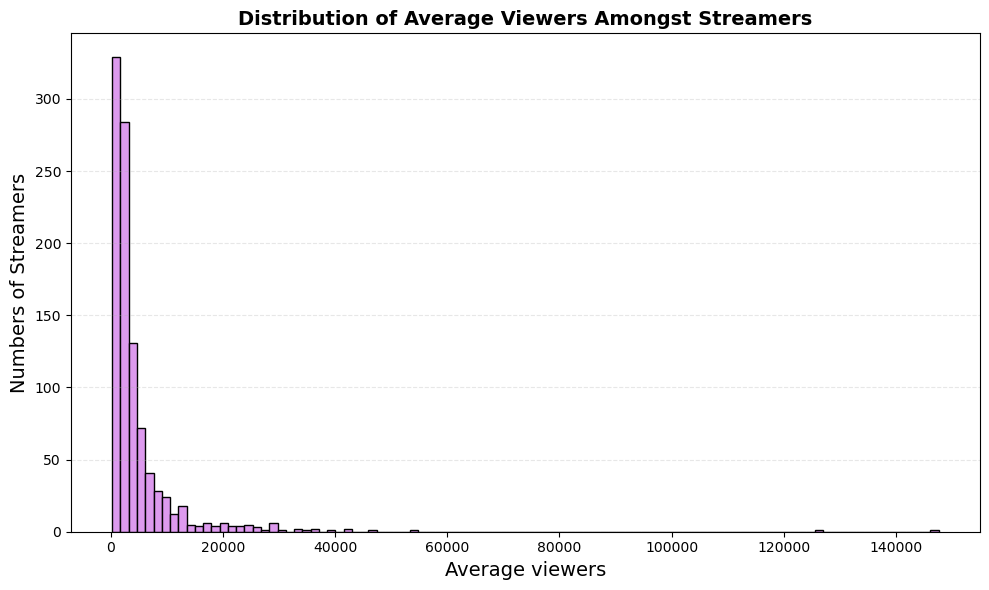

In [ ]:
Avgview = df["Average viewers"] 

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(Avgview, bins=100, color="#DD9AEE", edgecolor='black')

plt.title('Distribution of Average Viewers Amongst Streamers',
          fontsize=14, fontweight='bold')
plt.xlabel('Average viewers', fontsize=14)
plt.ylabel('Numbers of Streamers', fontsize=14)
ax.grid(True, alpha=0.3, axis='y',  linestyle='--')

plt.tight_layout()
plt.show()

Here I wanted to answer the question, How many streamers are reaching high numbers of average viewers? I wanted to put them in categories and see where most streamers lie in comparison with each other. That is why I chose to use a Historgram. Once examining the graph, I realized most of the Top 1000 are averaging less than 20,000 viewers. Which confirms what the graphs above were saying. There isn't much distribution, as there are 2 very big outliers. Having a gap of more than 100,000 viewers. Most succesful streamers are all in a few bins. Showcasing a very right skewed Histogram. 

### Is there a relationship between Stream time and Watchtime? (Relationship comparison)

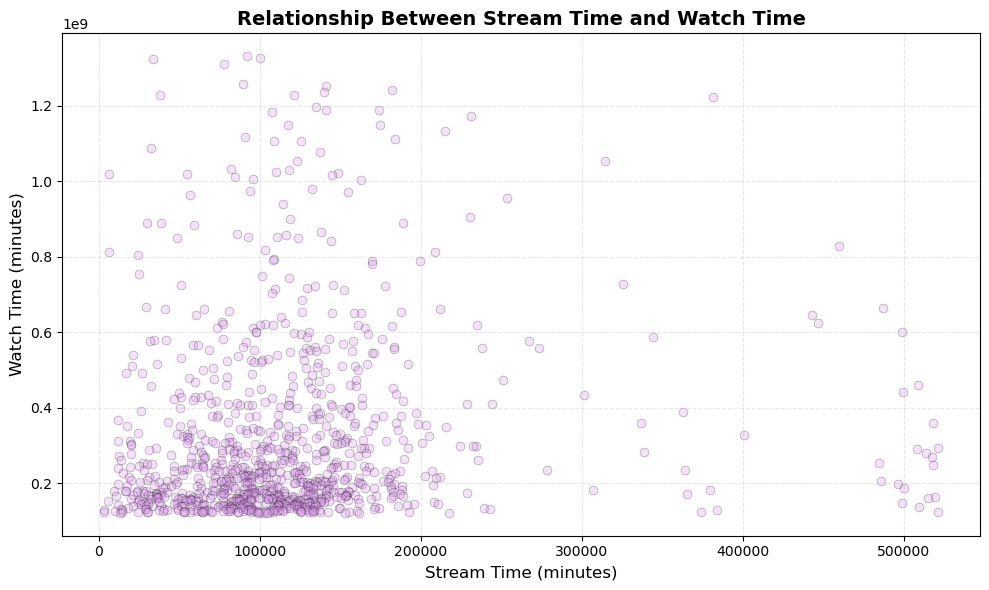

In [ ]:
#Filter out top 5% of watch time to reduce clutter
threshold = df["Watch time(Minutes)"].quantile(0.95)
filtered = df[df["Watch time(Minutes)"] <= threshold]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=filtered,
    x="Stream time(minutes)",
    y="Watch time(Minutes)",
    color="#DD9AEE",
    edgecolor="black",
    alpha=0.3,   
    s=40  #Smaller points
)

plt.title("Relationship Between Stream Time and Watch Time", fontsize=14, fontweight="bold")
plt.xlabel("Stream Time (minutes)", fontsize=12)
plt.ylabel("Watch Time (minutes)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Pearson r = 0.15058790087123808 p = 1.7239485521908603e-06


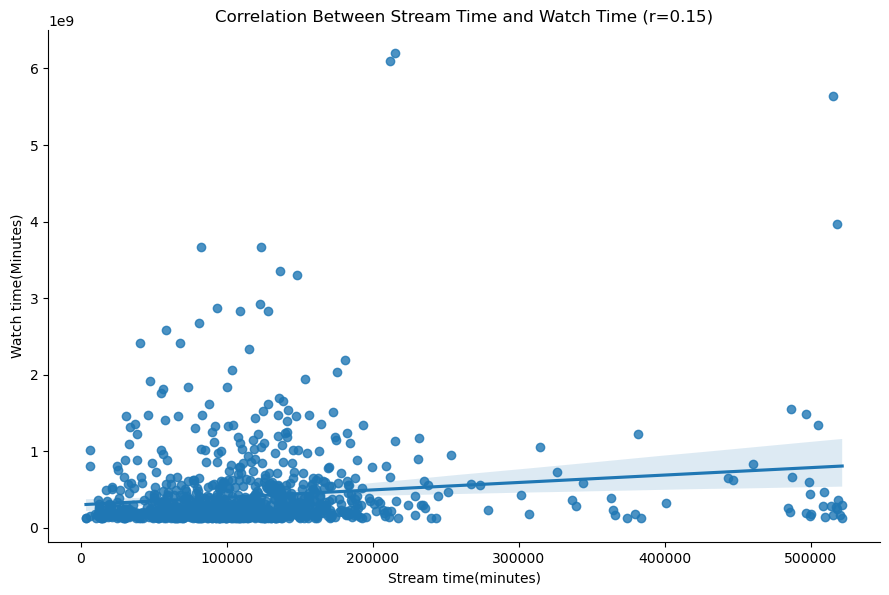

In [200]:
y = df["Watch time(Minutes)"]
x = df["Stream time(minutes)"]

r, p = pearsonr(x, y)
print("Pearson r =", r, "p =", p)

sns.lmplot(data=df, x="Stream time(minutes)", y="Watch time(Minutes)", height=6, aspect=1.5)
plt.title(f"Correlation Between Stream Time and Watch Time (r={r:.2f})")
plt.show()

These metrics are not per stream, rather how long they have streamed their entire career and how many total minutes viewers have tuned into their stream for. I chose another scatterplot as I wanted to compare 2 metrics again. I wanted to see if they had a relationship. I wanted to ask, Do longer streams result in more viewers? The graph shows, not at all. Those streamers with less stream time (or who have just started) are more likely to have more people watching their streams rather than those who have streamed longer in total. The correlation ended up being R = 0.15. Which is weak. There must be more factors contributing to less stream time having more watch time. 

### How does average viewership change by language, and then by partnership status? (Multipanel figure)

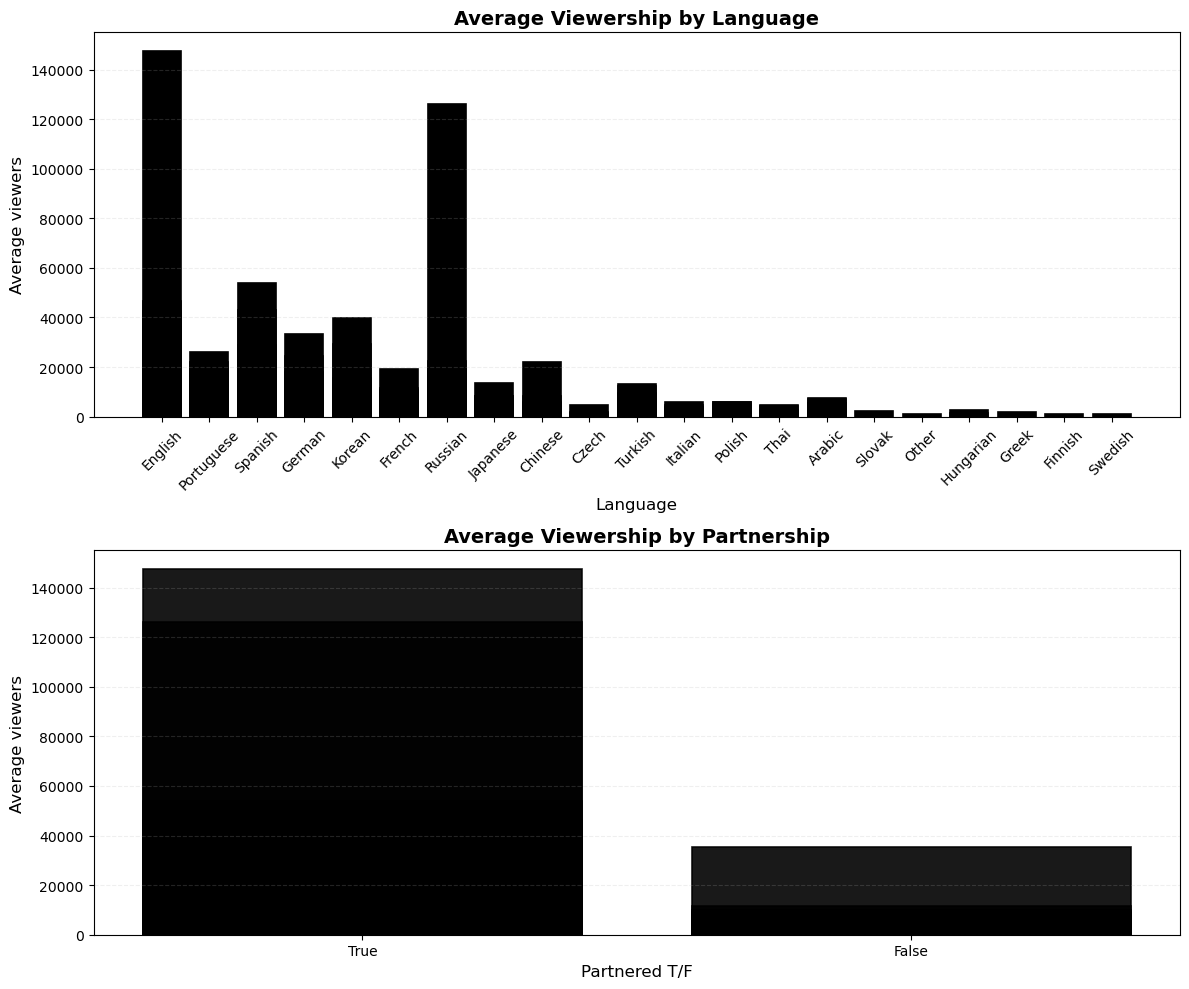

In [206]:
#Average viewers by partnership

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

#First Plot
ax = axes[0]
ax.bar(df['Language'], df['Average viewers'],
       color="black", alpha=1.0, edgecolor='black', linewidth=1.2)

ax.grid(linestyle='--', alpha=0.2, axis='y')
ax.set_xlabel('Language', fontsize=12)
ax.set_ylabel('Average viewers', fontsize=12)
ax.set_title('Average Viewership by Language', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)


#Second plot
ax = axes[1]

partner_str = df['Partnered'].astype(str)

ax.bar(partner_str, df['Average viewers'],
       color="black", alpha=0.9, edgecolor='black', linewidth=1.2)

ax.grid(linestyle='--', alpha=0.2, axis='y')
ax.set_xlabel('Partnered T/F', fontsize=12)
ax.set_ylabel('Average viewers', fontsize=12)
ax.set_title('Average Viewership by Partnership', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()


I wanted to create 2 barcharts in a multipanel figure to get more information about the average viewers metrics and see a direct comparison between the 2. What language are all the average viewers watching, and if the streamer they are watching is partnered or not. No surprise that the English streamers have most of the Average viewers, as Twitch is the no.1 Live streaming platform for videogames in the US, where most people in the US speak english, but there are a still a very large number of viewers engaging with Russian streams. The graph was purely to show demographic. With the partnered chart, I specifically wanted to see how many viewers were watching partnered streams, but this graph also shows how many of the top 1000 are partnered or not. Knowing that Twitch partners with "top-performing streamers who show consistency, a strong community, engaging content, and adherence to guidelines", it makes sense that those who are partnered are getting more streams, because twitch values strong community, but it also goes to show that those who are not partnered don't have to be partnered to be top 1000, but they must get more of a community to be apart of their partnered program. 

In [ ]:
from scipy.stats import ttest_ind

group1 = df[df["Partnered"]==True]["Average viewers"].dropna()
group2 = df[df["Partnered"]==False]["Average viewers"].dropna()

t, p = ttest_ind(group1, group2, equal_var=False)

#Cohen’s d
cohen_d = (group1.mean() - group2.mean()) / np.sqrt(((group1.std()**2 + group2.std()**2)/2))

print("Welch’s t-test: t =", t, "p =", p)
print("Cohen’s d =", cohen_d)

import scipy.stats as stats
difference = group1.mean() - group2.mean()
l = np.sqrt(group1.var()/len(group1) + group2.var()/len(group2))
ci_low, ci_high = stats.t.interval(0.95, df=len(group1)+len(group2)-2, loc=difference, scale=l)
print("95% CI for mean difference:", ci_low, "to", ci_high)

Welch’s t-test: t = -0.32106141619213424 p = 0.7511614306175836
Cohen’s d = -0.06483141998265386
95% CI for mean difference: -3680.020476344754 to 2645.151541598519


These results above further my previous chart displaying the same metrics. The test shows no significant difference in average viewers between partnered and non‑partnered channels. Partnership status does not appear to influence average viewership in this dataset. Factors other than partnership may be more relevant in driving audience size.


### Association Between Two Categorical Variables

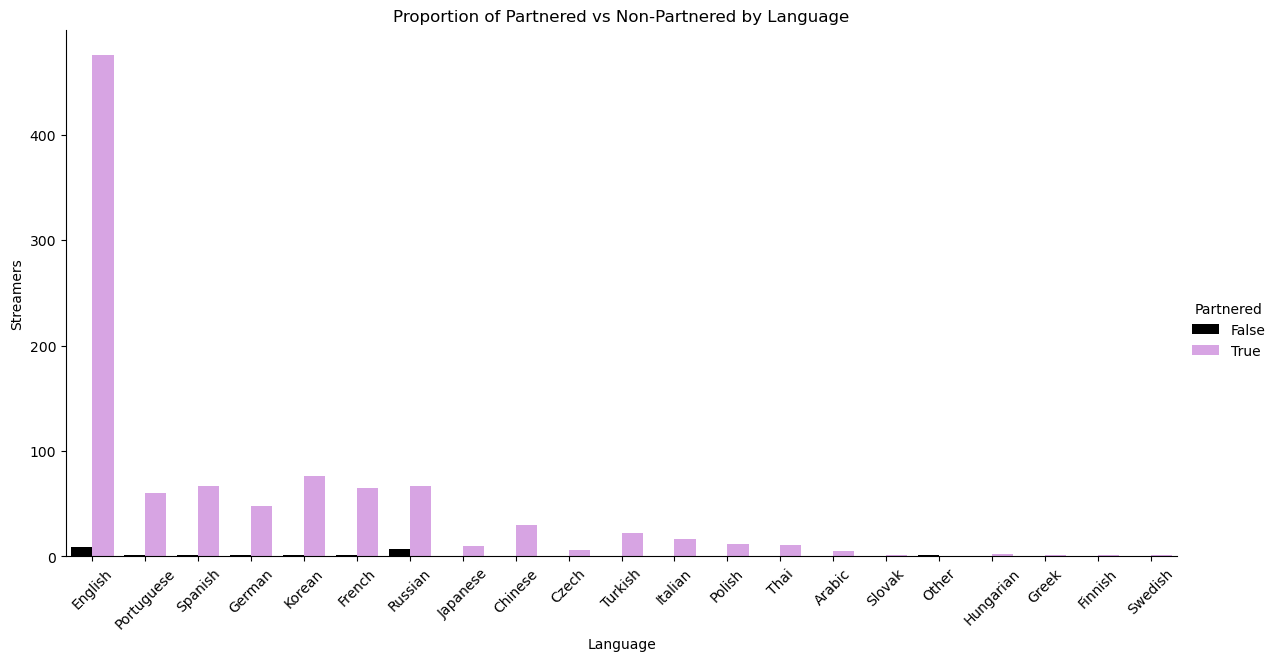

In [169]:
g = sns.catplot(
    data=df, x="Language", hue="Partnered", kind="count",
    height=6, aspect=2, palette=["black", "#DD9AEE"]
)

g.set_xticklabels(rotation=45)
g.set_ylabels("Streamers")

plt.title("Proportion of Partnered vs Non-Partnered by Language")
plt.show()

I thought showcasing another barchart with the information in the multipanel figure, would show my insights more clearly. This gives us more insight on around how many streamers belong to a different langauge. This also can enhance what we saw earlier, with Russian streamers being a small amount, but amassing a lot of viewers despite being a minorty of the pool and being one of the only group of streamers to be close to same numbers are english streamers. 

### How many Streamers are rated Mature?

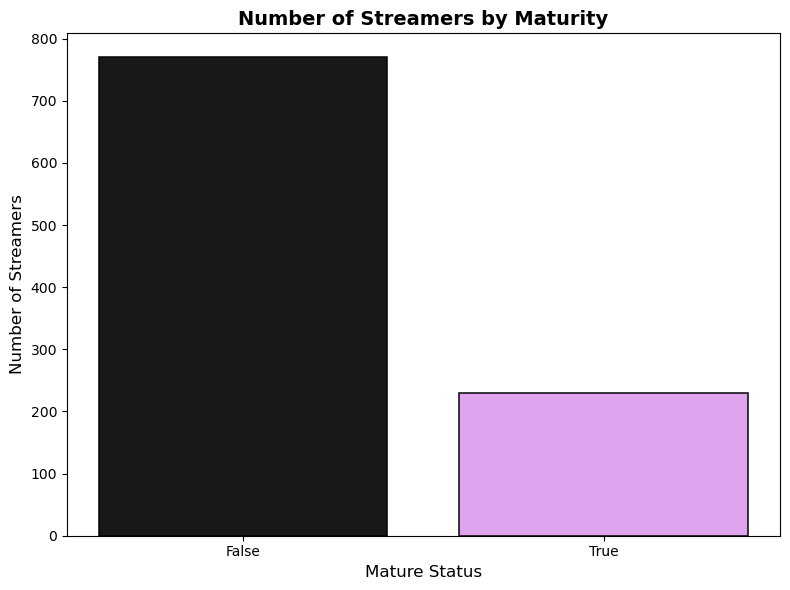

In [199]:
#Count how many streamers are mature vs not
maturity_counts = df["Mature"].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(maturity_counts.index.astype(str), maturity_counts.values,
       color=["black", "#DD9AEE"], alpha=0.9, edgecolor="black", linewidth=1.2)

ax.set_xlabel("Mature Status", fontsize=12)
ax.set_ylabel("Number of Streamers", fontsize=12)
ax.set_title("Number of Streamers by Maturity", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

In [192]:
pd.crosstab(df["Partnered"], df["Mature"])

Mature,False,True
Partnered,,
False,17,5
True,753,225


I  chose a barchart for this camparison as I wanted to see direct number values. In this new barchart, I wanted to examine how many of the Top 1000 were Mature, and wether Mature streams were more succesful. According the the graph, it seems most streamers are not rated Mature. I then wanted to know exactly how many were Mature and Partnered and see if there was any correlation between them, but from looking at the cross table, maturity is not the majority, so it is not as succesful as non mature streams. Although most are not mature, some channels that are mature are partnered, so it doesn't seem that matters in becoming a partner. 

- 17 channels: Not partnered, not Mature
- 753 channels Partnered, not Mature

- 5 channels Not partnered, Mature
- 225 channels Partnered, Mature



## Conclusions

From observing and analyzing all the graphs, the main takeaways are: 

Followers don’t guarantee viewers — the scatterplot showed only a moderate correlation. The histogram confirmed most of the top 1000 average under 20,000 viewers, with just a few huge outliers. 

Stream time didn’t line up with watch time either; some streamers with less total hours actually had more watch minutes, so more hours doesn’t automatically equal success.

Language mattered, with English dominating but Russian and Portuguese still pulling big audiences. 

Partnership didn’t change average viewership — the t‑test showed no significant difference.

Maturity ratings weren’t a big factor either; most channels aren’t mature, and is still the minority whether partnered or not.

Overall, raw numbers like followers, hours streamed, or partnership status don’t guarantee success. What matters most is building a strong community and delivering content people actually want to watch. Success is unique to each individual streamer.


## Appendix

Mishra, Aayush. *Twitchdata*. Kaggle, 2021, https://www.kaggle.com/datasets/aayushmishra1512/twitchdata.

*Learn Python*. LearnPython.org, https://www.learnpython.org/.

*Data Analysis with Python*. GeeksforGeeks, https://www.geeksforgeeks.org/data-analysis/data-analysis-with-python/.

*Scipy Stats – Python*. GeeksforGeeks, https://www.geeksforgeeks.org/python/scipy-stats/.

*Data Visualization: Different Charts in Python*. GeeksforGeeks, https://www.geeksforgeeks.org/data-science/data-visualization-different-charts-python/.

*Python Libraries for Data Analytics*. GeeksforGeeks Blogs, https://www.geeksforgeeks.org/blogs/python-libraries-for-data-analytics/.

*Twitch Partners*. Twitch, https://www.twitch.tv/p/en/partners/?utm_referrer=https://www.google.com/.

“Need Help Writing Function Ticker.” *Stack Overflow*, 2013, https://stackoverflow.com/questions/15334561/need-help-writing-function-ticker.

*Matplotlib Ticker FuncFormatter Class in Python*. GeeksforGeeks, https://www.geeksforgeeks.org/python/matplotlib-ticker-funcformatter-class-in-python/.

Whyamit404. “Understanding Pandas Crosstab with Simple Examples.” *Medium*, 2021, https://medium.com/@whyamit404/understanding-pandas-crosstab-with-simple-examples-90cf6ea5a9a1.

“Matplotlib: Make Multiple Panel Figure of Existing Figures.” *Stack Overflow*, 2021, https://stackoverflow.com/questions/67637776/matplotlib-make-multiple-panel-figure-of-existing-figures.

“Matplotlib Axes Plot vs Pyplot Plot.” *Stack Overflow*, 2017, https://stackoverflow.com/questions/43482191/matplotlib-axes-plot-vs-pyplot-plot.